<img src="images/0925/1.PNG">

<img src="images/0925/2.PNG">

최종 파라미터: a=2.000006, b=2.999978
최종 MSE: 0.0000000002 (정답은 a=2, b=3)


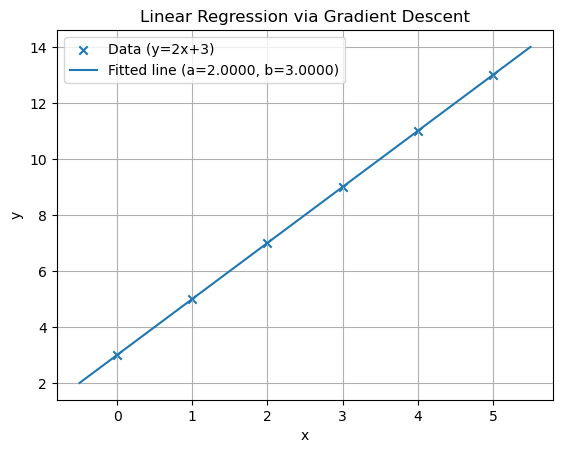

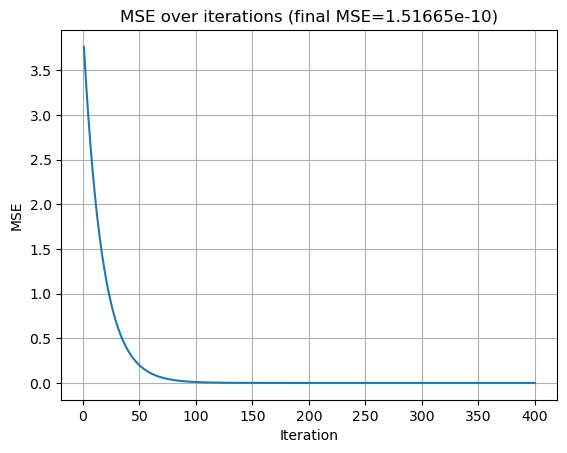

In [1]:
# -*- coding: utf-8 -*-
# Linear Regression from scratch with MSE + manual partial derivatives (gradient descent)

import numpy as np
import matplotlib.pyplot as plt

# 1) 데이터 만들기: y = 2x + 3 을 정확히 만족하는 6개 점
x = np.array([0, 1, 2, 3, 4, 5], dtype=float)
y = 2 * x + 3

# 2) MSE와 그라디언트(편미분) 직접 구현
def mse(a, b, x, y):
    """
    MSE(a,b) = (1/n) * sum_i (y_i - (a*x_i + b))^2
    """
    y_hat = a * x + b
    return np.mean((y - y_hat) ** 2)

def grad(a, b, x, y):
    """
    d(MSE)/da = -(2/n) * sum_i x_i * (y_i - y_hat_i)
    d(MSE)/db = -(2/n) * sum_i (y_i - y_hat_i)
    """
    n = len(x)
    y_hat = a * x + b
    residual = y - y_hat
    d_a = (-2.0 / n) * np.sum(x * residual)
    d_b = (-2.0 / n) * np.sum(residual)
    return d_a, d_b

# 3) 경사하강법으로 학습
rng = np.random.default_rng(42)
a = rng.uniform(-5, 5)   # 기울기 초기값 (무작위)
b = rng.uniform(-5, 5)   # 절편 초기값 (무작위)

lr = 0.05     # 학습률
iters = 400   # 반복 횟수

history_mse = []
history_a = []
history_b = []

for _ in range(iters):
    d_a, d_b = grad(a, b, x, y)
    a -= lr * d_a
    b -= lr * d_b
    history_mse.append(mse(a, b, x, y))
    history_a.append(a)
    history_b.append(b)

print(f"최종 파라미터: a={a:.6f}, b={b:.6f}")
print(f"최종 MSE: {history_mse[-1]:.10f} (정답은 a=2, b=3)")

# 4) 결과 시각화
xx = np.linspace(x.min() - 0.5, x.max() + 0.5, 200)
yy = a * xx + b

plt.figure()
plt.scatter(x, y, label="Data (y=2x+3)", marker="x")
plt.plot(xx, yy, label=f"Fitted line (a={a:.4f}, b={b:.4f})")
plt.title("Linear Regression via Gradient Descent")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.grid(True)
plt.show()

plt.figure()
plt.plot(range(1, iters + 1), history_mse)
plt.title(f"MSE over iterations (final MSE={history_mse[-1]:.6g})")
plt.xlabel("Iteration"); plt.ylabel("MSE"); plt.grid(True)
plt.show()

In [21]:
import numpy as np

# 데이터 정의
x = np.array([0, 1, 2, 3, 4, 5], dtype=float)
y = np.array([100 * i - 20 for i in x])

# 초기값 고정
a = 10000
b = 100000

# MSE 함수
def mse(a, b, x, y):
    y_hat = a * x + b
    return np.mean((y - y_hat) ** 2)

# 기울기(편미분) 함수
def grad(a, b, x, y):
    n = len(x)
    y_hat = a * x + b
    e = y - y_hat
    d_a = (-1 / (2.0 * n)) * np.sum(x * e)
    d_b = (-1 / (2.0 * n)) * np.sum(e)
    return d_a, d_b

# 경사하강법 학습
lr = 0.05
iters = 400

for j in range(iters):
    d_a, d_b = grad(a, b, x, y)
    print('여기에서봐야한다', a, b)
    a -= lr * d_a
    b -= lr * d_b
    cost = mse(a, b, x, y)
    print(f"iter={j+1}, a={a:.6f}, b={b:.6f}, MSE={cost:.6f}")

print("\n최종 결과:")
print(f"a={a:.6f}, b={b:.6f}, MSE={mse(a,b,x,y):.6f}")

여기에서봐야한다 10000 100000
iter=1, a=1480.000000, b=96880.750000, MSE=10075827525.562500
여기에서봐야한다 1480.0 96880.75
iter=2, a=-4892.546875, b=94371.981250, MSE=6782048141.968117
여기에서봐야한다 -4892.546875 94371.98125
iter=3, a=-9647.920378, b=92324.215898, MSE=4897668447.486962
여기에서봐야한다 -9647.920377604167 92324.2158984375
iter=4, a=-13185.535451, b=90624.855525, MSE=3813129270.725143
여기에서봐야한다 -13185.535451388889 90624.85552457682
iter=5, a=-15806.237047, b=89189.080102, MSE=3182599554.155408
여기에서봐야한다 -15806.23704739832 89189.08010217421
iter=6, a=-17736.625230, b=87952.992915, MSE=2809871953.742469
여기에서봐야한다 -17736.62523042209 87952.99291508224
iter=7, a=-19147.377339, b=86868.457169, MSE=2583626780.483226
여기에서봐야한다 -19147.377338976334 86868.45716910656
iter=8, a=-20167.048605, b=85899.206824, MSE=2440704606.141048
여기에서봐야한다 -20167.04860519675 85899.20682356492
iter=9, a=-20892.467060, b=85017.917191, MSE=2345269321.033514
여기에서봐야한다 -20892.467059645303 85017.9171908006
iter=10, a=-21396.563183, b=8420

In [25]:
import numpy as np

# 데이터 정의
x = np.array([0, 1, 2, 3, 4, 5], dtype=float)
y = np.array([100 * i - 20 for i in x])

# 초기값
a = 20000
b = 7800

# Loss 함수: 1/(2n)
def mse(a, b, x, y):
    y_hat = a * x + b
    return np.mean((y - y_hat) ** 2) / 2   # 여기서 1/(2n) 처리가 됨

# Gradient 함수
def grad(a, b, x, y):
    n = len(x)
    y_hat = a * x + b
    e = y - y_hat
    d_a = (-1.0 / n) * np.sum(x * e)
    d_b = (-1.0 / n) * np.sum(e)
    return d_a, d_b

# 경사하강법 학습
lr = 0.05
iters = 4000

for j in range(iters):
    d_a, d_b = grad(a, b, x, y)
    a -= lr * d_a
    b -= lr * d_b
    cost = mse(a, b, x, y)
    print(f"iter={j+1}, a={a:.6f}, b={b:.6f}, MSE={cost:.6f}")

print("\n최종 결과:")
print(f"a={a:.6f}, b={b:.6f}, MSE={mse(a,b,x,y):.6f}")

iter=1, a=9901.666667, b=4921.500000, MSE=573629618.995370
iter=2, a=4791.548611, b=3449.216667, MSE=147589775.423250
iter=3, a=2207.603414, b=2689.312257, MSE=38304706.558545
iter=4, a=902.954484, b=2290.396217, MSE=10261862.403712
iter=5, a=246.134152, b=2074.507096, MSE=3056555.486984
iter=6, a=-82.657388, b=1951.514972, MSE=1196073.260527
iter=7, a=-245.378790, b=1875.771397, MSE=706806.347726
iter=8, a=-324.051603, b=1824.155176, MSE=569585.669655
iter=9, a=-360.214015, b=1784.953868, MSE=523002.539446
iter=10, a=-374.901825, b=1752.232926, MSE=500000.302019
iter=11, a=-378.767604, b=1722.984008, MSE=483370.351468
iter=12, a=-377.205453, b=1695.680758, MSE=468689.485108
iter=13, a=-372.946382, b=1669.547402, MSE=454814.001991
iter=14, a=-367.372715, b=1644.188329, MSE=441441.604291
iter=15, a=-361.183762, b=1619.400502, MSE=428486.061515
iter=16, a=-354.732934, b=1595.078448, MSE=415916.815565
iter=17, a=-348.198478, b=1571.166142, MSE=403717.834876
iter=18, a=-341.669944, b=1547.